Plot the correlation between IF signal and transcriptome signal.


Using Splotch covarites files as annotation files

In [1]:
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from scipy.stats import linregress, spearmanr, pearsonr
import numpy as np
import math
import seaborn as sns
%matplotlib inline
matplotlib.rcParams.update({'axes.linewidth': 0.25,
                            'xtick.major.size': 2,
                            'xtick.major.width': 0.25,
                            'ytick.major.size': 2,
                            'ytick.major.width': 0.25,
                            'pdf.fonttype': 42,
                            'font.sans-serif': 'Arial',
                           'ps.fonttype':42})

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
path = '../../smomics_data'


# tags

In [4]:
# Load Lambda file
filename = os.path.join(path, 'lambdas_pmeans_spleen_exons_tags_2tags.tsv')
lambda_posterior_means = pd.read_csv(filename, index_col=0, sep='\t', header=[0,1])

# Take exp()
lambda_posterior_means = lambda_posterior_means.astype(float)
lambda_posterior_means = np.exp(lambda_posterior_means-1)

# Read file
filename = os.path.join(path, 'lambdas_pmeans_spleen_exons_tags_6tags.tsv')
lambda_posterior_meansTAGS_6tags = pd.read_csv(filename, index_col=0, sep='\t', header=[0,1])

# Take exp()
lambda_posterior_meansTAGS_6tags = lambda_posterior_meansTAGS_6tags.astype(float)
lambda_posterior_meansTAGS_6tags = np.exp(lambda_posterior_meansTAGS_6tags-1)

# Read file
filename = os.path.join(path, 'lambdas_pmeans_spleen_exons_tags_ifs.tsv')
lambda_posterior_meansTAGS_ifs = pd.read_csv(filename, index_col=0, sep='\t', header=[0,1])

# Take exp()
lambda_posterior_meansTAGS_ifs = lambda_posterior_meansTAGS_ifs.astype(float)
lambda_posterior_meansTAGS_ifs = np.exp(lambda_posterior_meansTAGS_ifs-1)


In [5]:
# Change names on genes, ie remove '_'
nwe=[]
nm=lambda_posterior_meansTAGS_ifs.index
for item in nm:
    nwe.append(str(item).split("-")[0])
lambda_posterior_meansTAGS_ifs.index = nwe

# Change names on genes, ie remove '_'
nwe=[]
nm=lambda_posterior_meansTAGS_6tags.index
for item in nm:
    nwe.append(str(item).split("-")[0])
lambda_posterior_meansTAGS_6tags.index = nwe

nwe=[]
nm=lambda_posterior_means.index
for item in nm:
    nwe.append(str(item).split("-")[0])
lambda_posterior_means.index = nwe

In [6]:
# Select gene
pd.set_option('display.max_colwidth', -1)
tags = lambda_posterior_meansTAGS_ifs.index

collect_tags = {}
for tag in tags:
    
    lambda_tag_2tags = lambda_posterior_means.loc[tag, :].to_frame().reset_index()
    lambda_tag_2tags =  lambda_tag_2tags[(lambda_tag_2tags[tag] > np.percentile(lambda_tag_2tags[tag].values,0.1)) & (lambda_tag_2tags[tag] < np.percentile(lambda_tag_2tags[tag].values,100))]

    # Get name of file, for plotting
    lambda_tag_2tags['name'] = lambda_tag_2tags['file'].str.split('/').str[-1].str.split('_stdata').str[0]

    lambda_tag_ifs = lambda_posterior_meansTAGS_ifs.loc[tag, :].to_frame().reset_index()
    lambda_tag_ifs =  lambda_tag_ifs[(lambda_tag_ifs[tag] > np.percentile(lambda_tag_ifs[tag].values,0.1)) & (lambda_tag_ifs[tag] < np.percentile(lambda_tag_ifs[tag].values,100))]
    # Get name of file, for plotting

    # Get name of file, for plotting
    lambda_tag_ifs['name'] = lambda_tag_ifs['file'].str.split('/').str[-1].str.split('_stdata').str[0]
    
    lambda_tag_6tags = lambda_posterior_meansTAGS_6tags.loc[tag, :].to_frame().reset_index()
    lambda_tag_6tags =  lambda_tag_6tags[(lambda_tag_6tags[tag] > np.percentile(lambda_tag_6tags[tag].values,0.1)) & (lambda_tag_6tags[tag] < np.percentile(lambda_tag_6tags[tag].values,100))]
    # Get name of file, for plotting

    # Get name of file, for plotting
    lambda_tag_6tags['name'] = lambda_tag_6tags['file'].str.split('/').str[-1].str.split('_stdata').str[0]
    collect_tags[tag] = lambda_tag_6tags.append(lambda_tag_ifs).append(lambda_tag_2tags)


# Annotation

In [7]:
annot_list = []

for stdata in list(set(list(lambda_tag_2tags['name'].tolist()+lambda_tag_6tags['name'].tolist()+lambda_tag_ifs['name'].tolist()))):
    
    well = stdata
    print(well)
    if well == '10015CN88_E2':
        continue
    if well == '10015CN87_E2':
        continue
    if well == '10015CN88_D1':
        continue
#     if well == '10015CN77_C1':
#         continue
#     if well == '10015CN77_D1':
#         continue    
    filename = os.path.join(path, well + '_stdata_adjusted.tsv.annotations.tsv')

    annot_file = pd.read_csv(filename, sep = '\t')
    annot_file = pd.melt(annot_file, id_vars='Unnamed: 0')
    annot_file = annot_file[annot_file['value'] != 0]
    annot_file['image'] = well
    annot_file.drop(['value'], axis=1, inplace=True)
    annot_file.rename(columns = {'Unnamed: 0':'value', 'variable':'x_y'}, inplace=True)

    annot_list.append(annot_file)
    
# Concat
annotdf = pd.concat(annot_list)
annotdf = annotdf[~annotdf['value'].isin(['White pulp'])]
print(annotdf.head())


10015CN77_D1
10015CN87_D2
10015CN87_D1
10015CN77_C1
10015CN87_E2
10015CN88_E2
10015CN88_E1
10015CN77_E1
10015CN88_D1
10015CN87_C1
       value    x_y         image
3   Red pulp  28_21  10015CN77_D1
7   Red pulp  9_28   10015CN77_D1
11  Red pulp  28_30  10015CN77_D1
14  PALS      3_24   10015CN77_D1
19  Red pulp  29_24  10015CN77_D1


In [8]:
# Select gene
collect_merged = {}
pd.set_option('display.max_colwidth', -1)
genes = ['F480', 'IgD',]

collect_genes = {}
for gene in genes:
    # subset all genes
    
    if not gene in lambda_posterior_means.index:
        continue
        
    lambda_gene = collect_tags[gene]
    
    #collect intensities per gene 
    ab = gene
    samples = list(set(lambda_gene['name'].tolist()))
    ab_list = []
    for well in samples:
        
        if well == '10015CN88_E2':
            continue
        if well == '10015CN87_E2':
            continue
        if well == '10015CN88_D1':
            continue
#         if well == '10015CN77_C1':
#             continue
#         if well == '10015CN77_D1':
#             continue

        filename = os.path.join(path, well + '_' + ab + '_intensitites.tsv')

        file = pd.read_csv(filename, sep = '\t')

        spot_coord = []

        # if spot coordinates in float...
        if len(list(file)[0].split('.')) == 3:
            for spots in list(file):
                spot_tmp = [ float(elem) for elem in spots.split('_') ]
                spot_tmp2 = [ round(elem, 0) for elem in spot_tmp ]
                spot_tmp3 = [ int(elem) for elem in spot_tmp2 ]

                new_spot_coord = str(spot_tmp3[0]) + '_' + str(spot_tmp3[1])
                spot_coord.append(new_spot_coord)
        else:
            for spots in list(file):
                spots_tmp = spots.split('_')
                new_spot_coord = str(spots_tmp[0]) + '_' + str(spots_tmp[1])   
                spot_coord.append(new_spot_coord)

        file.columns = spot_coord

        filemelt = pd.melt(file)
        filemelt['name'] = well
        filemelt.columns = ['coordinate', ab+".IF", 'name']

        ab_list.append(filemelt)

    abfile = pd.concat(ab_list)

    lambdadfTMP = pd.merge(lambda_gene, abfile,  how='left', on=['name','coordinate'])
    lambdadf = pd.merge(lambdadfTMP, annotdf, how='left', left_on=['name','coordinate'], right_on=['image', 'x_y'])
    
    # Only lok at specific regions
    #lambdadf_rm = lambdadf[lambdadf['value'].isin(['Red pulp', 'B follicle', 'PALS', 'Marginal zone'])]

    # Take mean per region per sample

    #trans = lambdadf_rm.groupby(['name', 'value'])[ab, gene].mean()
    trans = lambdadf.groupby(['name', 'value'])[ab+".IF", gene].mean()

    trans.reset_index(inplace=True)

    # Scale min max per sample
    trans[[ab+".IF.norm", gene + '.norm']] = trans.groupby(['name'])[ab+".IF", gene].transform(lambda x: preprocessing.minmax_scale(x))

    collect_merged[gene] = trans

F480
std err:0.069
Spearman's rho: 0.78
p-value: 8.764783783014459e-07
IgD
std err:0.149
Spearman's rho: 0.73
p-value: 1.2338514676588536e-05


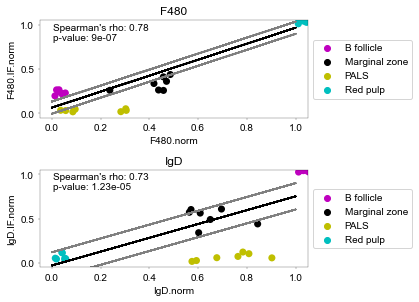

In [9]:
# initialize a figure
fig = matplotlib.pyplot.figure(figsize=(6, 6))
num_cols = 1
axes = []

for i in range(0,int((int(len(genes))/num_cols))):
    for j in range(0, num_cols):
        ax = plt.subplot2grid((int((len(genes))/num_cols+1), num_cols), (i, j))
        axes.append(ax) 
for count, gene in enumerate(collect_merged):

    ax = axes[count]
    plot_trans = collect_merged[gene]
    
    tag = gene
    
    if not tag + '.norm' in plot_trans.columns:
        continue

    plot_trans['jitter_y'] = plot_trans[tag + '.IF.norm'] + 0.05 * np.random.rand(len(plot_trans[tag + '.IF.norm'].tolist())) +0.01
    plot_trans['jitter_x'] = plot_trans[gene + '.norm'] + 0.05 * np.random.rand(len(plot_trans[gene + '.norm'].tolist())) +0.01
    x = 'jitter_x'
    y = 'jitter_y'
    hue = 'value'
    palette = {'Red pulp':'c', 'B follicle':'m', 'PALS':'y', 'Marginal zone':'k', 'White pulp':'r', 'IGDpos':'b'}
    data = plot_trans

    sns.scatterplot(x=x, y=y, data=data, ax=ax, hue=hue, s=50, linewidth=0, palette=palette)

    # X and Y axis
    ax.set_xlabel(gene + '.norm')
    ax.set_ylabel(tag + '.IF.norm')

    # Calculate the linear regression
    X = gene + '.norm'
    Y = tag + '.IF.norm'

    slope, intercept, r_value, p_value, std_err = linregress(data[X], data[Y])

    print(gene)
    print('std err:' + str(round(std_err, 3)))

    coef = np.polyfit(data[X],data[y],1)
    poly1d_fn = np.poly1d(coef)
    ax.plot(data[X], poly1d_fn(data[X]), c="k")
    ax.plot(data[X], poly1d_fn(data[X])+std_err, c="grey")
    ax.plot(data[X], poly1d_fn(data[X])-std_err, c="grey")
    #ax.errorbar(trans[x], poly1d_fn(trans[x]), yerr=poly1d_fn(trans[x]) - trans[y], fmt='.k')

    # Spearman's & Pearson's r
    spear, ps = spearmanr(data[X], data[Y])
    pear, pp = pearsonr(data[X], data[Y])
    print("Spearman's rho: " + str(round(spear, 2)))
    print("p-value: " + str(ps))

    ax.text(0.05, 0.9, "Spearman's rho: " + str(round(spear, 2)), transform=ax.transAxes, fontsize=10)
    ax.text(0.05, 0.8, "p-value: " + str(round(ps, 7)), transform=ax.transAxes, fontsize=10)
    #ax.get_legend().remove()

    # title
    ax.set_title(gene)

    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()

#     for i, txt in enumerate(plot_trans['name']):
#         ax.annotate(txt, (plot_trans['jitter_x'][i]+0.005, plot_trans['jitter_y'][i]+0.005))

plt.savefig("../../figures/sm_IF_vs_tags_all.pdf", transparent=True, bbox_inches = 'tight',
   pad_inches = 0, dpi=1200, rasterized=True)

In [10]:
len(np.unique(plot_trans['name']))

7

In [11]:
i

1

In [12]:
(0.79+0.73)/2

0.76